In [765]:
from bs4 import BeautifulSoup
import requests
from pprint import pprint

DATE = "2022-12-14"
URL = "https://hansard.parliament.uk/Commons/2022-12-14/debates/22121461000004/Engagements"

# DATE = "2022-12-07"
# URL = "https://hansard.parliament.uk/Commons/2022-12-07/debates/8253154F-B5B4-4507-8EDD-ACB8A3267B4C/Engagements"

# DATE = "2022-11-30"
# URL = "https://hansard.parliament.uk/Commons/2022-11-30/debates/1BFA1A26-3814-40E6-B310-418F6C03ED30/Engagements"

In [766]:
import urllib.request

# TODO: Understand
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'

url = URL
headers={'User-Agent':user_agent,}

request=urllib.request.Request(url,None,headers) #The assembled request
response = urllib.request.urlopen(request)
data = response.read().decode(response.headers.get_content_charset())

In [767]:
soup = BeautifulSoup(data, 'html.parser')

In [768]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width" name="viewport"/>
  <link href="/dist/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="https://cookiemanager.parliament.uk/cookiemanager.css" rel="stylesheet">
   <!-- Google Tag Manager -->
   <script>
    (function (w, d, s, l, i) {
            w[l] = w[l] || [];

            w[l].push({
                'gtm.start': new Date().getTime(),
                event: 'gtm.js'
            });

            var f = d.getElementsByTagName(s)[0],
                j = d.createElement(s),
                dl = l != 'dataLayer' ? '&l=' + l : '';

            j.async = true;
            j.src = 'https://www.googletagmanager.com/gtm.js?id=' + i + dl;
            f.parentNode.insertBefore(j, f);
        })(window, document, 'script', 'dataLayer', 'GTM-PWZPG2V');
   </script>
   <!-- End Google Tag Manager -->
   <title>
    E

In [769]:
import re
members = soup.find_all("a", class_="attributed-to-details with-link")

member_ids = []
for _ in members:
    id_ = re.findall(r"[0-9]+", _["href"])[0]

    # Exclude the Speaker
    if id_ == "467":
        continue

    else: member_ids.append(id_)

len(member_ids)
member_ids

['3942',
 '4483',
 '3942',
 '4483',
 '4514',
 '4483',
 '4514',
 '4483',
 '4514',
 '4483',
 '4514',
 '4483',
 '4514',
 '4483',
 '4514',
 '4514',
 '4483',
 '4840',
 '4483',
 '4735',
 '4483',
 '4735',
 '4483',
 '4092',
 '4483',
 '188',
 '4483',
 '4406',
 '4483',
 '415',
 '4483',
 '3953',
 '4483',
 '4357',
 '4483']

In [770]:
import re

# Search all Debate 'Contributions'
debates = soup.find_all("div", class_="contribution")

pmqs = []
pm = []

question_debate = []
counta = 0

for tag in debates:
    if tag.attrs["data-share-title"] == "Contribution by Mr Speaker":
        continue

    if tag.attrs["data-share-title"] == "Contribution by The Prime Minister (Rishi Sunak)" or tag.attrs["data-share-title"] == "Contribution by The Prime Minister":
        member = "Prime Minister"
        children = tag.findChildren()
        for child in children:
            if child.attrs == {"class": ['content']}:
                pmqs.append((member, child.text.strip("\n")))

    else:
        member = re.sub(r"Contribution by ", "", tag.attrs["data-share-title"])
        children = tag.findChildren()


        for child in children:
            if child.attrs == {"class": ['content']}:
                pmqs.append((member, child.text.strip("\n")))

In [771]:
len(pmqs), pmqs

(35,
 [('John Stevenson (Carlisle) (Con)',
   'Q1.  If he will list his official engagements for Wednesday 14 December. (902827)'),
  ('Prime Minister',
   'I am sure the whole House will share my sorrow at the capsizing of a small boat in the channel in the early hours of this morning, and the tragic loss of human life. Our hearts go out to all those affected, and our tributes to those involved in the extensive rescue operation.This morning, I had meetings with ministerial colleagues and others, in addition to my duties in this House, including the visit of His Majesty the King. I shall have further such meetings later today.'),
  ('John Stevenson',
   'A three and a half hour journey takes six hours; a straight journey ends up with two changes and a diversion; a train is cancelled at short notice. This has become the experience of a west coast rail passenger. If Avanti does not get its act together, will the Government cancel its franchise?'),
  ('Prime Minister',
   'I thank my hon.

In [772]:
# Create Member Profiles
def get_member(id_):
    members_api = f"https://members-api.parliament.uk/api/Members/{id_}"

    try:
        result = requests.get(members_api, json=True).json()
    except:
        return None

    if len(result["value"]) > 0:
        title = result["value"]["nameFullTitle"]
        party = result["value"]["latestParty"]["name"]
        img = result["value"]["thumbnailUrl"]

        return id_, title, party, img

member_profiles = []
for id_ in member_ids:
    member_profiles.append(get_member(id_))

In [773]:
member_profiles

[('3942',
  'John Stevenson MP',
  'Conservative',
  'https://members-api.parliament.uk/api/Members/3942/Thumbnail'),
 ('4483',
  'Rt Hon Rishi Sunak MP',
  'Conservative',
  'https://members-api.parliament.uk/api/Members/4483/Thumbnail'),
 ('3942',
  'John Stevenson MP',
  'Conservative',
  'https://members-api.parliament.uk/api/Members/3942/Thumbnail'),
 ('4483',
  'Rt Hon Rishi Sunak MP',
  'Conservative',
  'https://members-api.parliament.uk/api/Members/4483/Thumbnail'),
 ('4514',
  'Rt Hon Keir Starmer MP',
  'Labour',
  'https://members-api.parliament.uk/api/Members/4514/Thumbnail'),
 ('4483',
  'Rt Hon Rishi Sunak MP',
  'Conservative',
  'https://members-api.parliament.uk/api/Members/4483/Thumbnail'),
 ('4514',
  'Rt Hon Keir Starmer MP',
  'Labour',
  'https://members-api.parliament.uk/api/Members/4514/Thumbnail'),
 ('4483',
  'Rt Hon Rishi Sunak MP',
  'Conservative',
  'https://members-api.parliament.uk/api/Members/4483/Thumbnail'),
 ('4514',
  'Rt Hon Keir Starmer MP',
  'L

In [774]:
# Asset Member Profiles == Debate Items in PMQs
assert len(member_profiles) == len(pmqs)

In [775]:
# Determine PMQ Boundaries
pm_id = "4483"
history = []
boundaries = []
start_idx = 0
_ = 0


speakers = [_ for _ in member_profiles if _[0] != pm_id]
last_member_id = speakers[-1][0]

while _ < len(member_profiles):
    cur_member_id = member_profiles[_][0]
    cur_member = member_profiles[_][1]

    if cur_member_id == pm_id:
        _ += 1
        continue

    history.append(cur_member_id)
    previous_member_id = history[-2] if len(history) > 1 else history[-1]

    if cur_member_id != previous_member_id:
        boundaries.append([start_idx, _ - 1])
        start_idx = _

    if cur_member_id == last_member_id:
        boundaries.append([start_idx, len(pmqs)])

    _ += 1

len(boundaries)
boundaries

[[0, 3],
 [4, 16],
 [17, 18],
 [19, 22],
 [23, 24],
 [25, 26],
 [27, 28],
 [29, 30],
 [31, 32],
 [33, 35]]

In [776]:
# Chunk into PMQ Debate Items
debate_chunks = []
for _ in boundaries:
    seek, stop = _[0], _[1]+1
    debate_chunks.append((seek, stop, pmqs[seek: stop]))

debate = (_ for _ in debate_chunks)

next(debate)

(0,
 4,
 [('John Stevenson (Carlisle) (Con)',
   'Q1.  If he will list his official engagements for Wednesday 14 December. (902827)'),
  ('Prime Minister',
   'I am sure the whole House will share my sorrow at the capsizing of a small boat in the channel in the early hours of this morning, and the tragic loss of human life. Our hearts go out to all those affected, and our tributes to those involved in the extensive rescue operation.This morning, I had meetings with ministerial colleagues and others, in addition to my duties in this House, including the visit of His Majesty the King. I shall have further such meetings later today.'),
  ('John Stevenson',
   'A three and a half hour journey takes six hours; a straight journey ends up with two changes and a diversion; a train is cancelled at short notice. This has become the experience of a west coast rail passenger. If Avanti does not get its act together, will the Government cancel its franchise?'),
  ('Prime Minister',
   'I thank my h

In [777]:
# Iterate PMQ Debate Chunk
next(debate)

(4,
 17,
 [('Keir Starmer (Holborn and St Pancras) (Lab)',
   'I join the Prime Minister: our prayers go out to those who capsized in the freezing waters of the channel last night. It is a reminder that the criminal gangs running those routes put the lives of the desperate at risk, and profit from their misery. They must be broken up and brought to justice.Tomorrow will be the first ever nationwide nurses’ strike. All the Prime Minister has to do to stop that is to open the door and discuss pay with them. If he did, the whole country would breathe a sigh of relief. Why won’t he?'),
  ('Prime Minister',
   'We have consistently spoken to all the unions involved in all the pay disputes that there are, but I am glad the right hon. and learned Gentleman has raised our nurses, because they do incredible work. It is worth putting on record exactly what we have done for our nurses: last year, when everyone else in the public sector had a public sector pay freeze, the nurses received a 3% pay 

In [778]:
# PMQ Storage Objects
class DebateItem:
    def __init__(self, date):
        self.date = date
        self.debate_idx = ""
        self.member = {}
        self.question = {
            "idx": []
        }
        self.response = {}

debate_item = DebateItem(DATE).__dict__

class PMQ:
    def __init__(self, type):
        self.type = type

    def __call__(self, debate_item):
        if self.type == "opposition":
            debate_item["question"]["opposition"] = []
            debate_item["response"]["opposition"] = []

            return debate_item

        elif self.type == "member":
            debate_item["question"]["member"] = []
            debate_item["response"]["member"] = []

            return debate_item

        else:
            raise ValueError("incorrect type")

class Member:
    def __init__(self, id, title, party, img_url):
        self.id = id
        self.title = title
        self.party = party
        self.img_url = img_url

pmq = PMQ(type="member")(debate_item)
pprint(pmq)

{'date': '2022-12-14',
 'debate_idx': '',
 'member': {},
 'question': {'idx': [], 'member': []},
 'response': {'member': []}}


In [779]:
# Run Debate
import re

debate_chunks = []
for _ in boundaries:
    seek, stop = _[0], _[1]+1
    debate_chunks.append((seek, stop, pmqs[seek: stop]))

def get_type(member_id):
    """ Get PMQ Type == Member | Opposition """
    if member_id in ["4514", "4390", "4735"]:
        return "opposition"

    else: return "member"

def clean(question):
    """ Clean question index-reference from debate item """
    cleaned = re.sub(r"(\b[Q]{1}[0-9]+[.])", "", question)
    cleaned = cleaned.lstrip()

    return cleaned

""" Construct generator object to iterate Debate Chunks """
debate = (_ for _ in debate_chunks)

pmq_items = []
caught_counta = 0
counta = 0

while counta < (len(debate_chunks)):

    seek, stop, discourse = next(debate)
    member_id, member_title, member_party, member_img = member_profiles[seek]

    member = Member(id=member_id, title=member_title, party=member_party, img_url=member_img).__dict__

    # TODO: Make 'Prime Minister' Robust
    questions = [_ for _ in discourse if _[0] != "Prime Minister"]
    responses = [_ for _ in discourse if _[0] == "Prime Minister"]

    type = get_type(member_id)

    debate_item = DebateItem(date=DATE).__dict__
    pmq = PMQ(type=type)(debate_item)

    pmq["debate_idx"] = counta + 1

    for idx, _ in enumerate(zip(questions, responses)):
        question, response = _

        q = question[1]
        r = response[1]

        tabled = re.findall(r"(\b[Q]{1}[0-9]+[.])", q)
        tabled = str(tabled[0]) if tabled != [] else False

        q = clean(question[1])

        if idx == 0:
            pmq["member"] = member

        if type == "opposition":
            q_idx = f"OP.{idx + 1}"

            pmq["question"]["idx"].append(q_idx)
            pmq["question"]["opposition"].append(q)
            pmq["response"]["opposition"].append(r)

        else:
            if idx > 0:
                """CASE: Supplement """
                prev_idx = pmq["question"]["idx"][-1]
                q_idx = f"{prev_idx}{idx}"

            elif not tabled:
                """CASE: Caught """
                caught_counta += 1
                q_idx = f"CAUGHT.{caught_counta}"

            else: q_idx = tabled

            pmq["question"]["idx"].append(q_idx)
            pmq["question"]["member"].append(q)
            pmq["response"]["member"].append(r)

    pmq_items.append(pmq)
    counta += 1

In [780]:
pprint(pmq_items)

[{'date': '2022-12-14',
  'debate_idx': 1,
  'member': {'id': '3942',
             'img_url': 'https://members-api.parliament.uk/api/Members/3942/Thumbnail',
             'party': 'Conservative',
             'title': 'John Stevenson MP'},
  'question': {'idx': ['Q1.', 'Q1.1'],
               'member': ['If he will list his official engagements for '
                          'Wednesday 14 December. (902827)',
                          'A three and a half hour journey takes six hours; a '
                          'straight journey ends up with two changes and a '
                          'diversion; a train is cancelled at short notice. '
                          'This has become the experience of a west coast rail '
                          'passenger. If Avanti does not get its act together, '
                          'will the Government cancel its franchise?']},
  'response': {'member': ['I am sure the whole House will share my sorrow at '
                          'the capsiz

In [781]:
# Inspect Indices
indices = [_["question"]["idx"] for _ in pmq_items]
indices

[['Q1.', 'Q1.1'],
 ['OP.1', 'OP.2', 'OP.3', 'OP.4', 'OP.5', 'OP.6'],
 ['Q2.'],
 ['OP.1', 'OP.2'],
 ['Q3.'],
 ['CAUGHT.1'],
 ['Q4.'],
 ['Q5.'],
 ['Q7.'],
 ['Q6.']]

In [782]:
# Output to JSON
import json

f_out = f"./data/pmqs_parsed_{DATE}.jsonl"
with open(f_out, "w") as f:
    for _ in pmq_items:
        f.write(json.dumps(_))
        f.write("\n")

In [783]:
# STORE THUMBNAIL
from PIL import Image, ImageOps, ImageDraw, ImageChops

def round_img(img):
    #img = img.resize((75, 75))

    img = img.resize((125, 125), resample=Image.Resampling.LANCZOS)
    big_size = (img.size[0] * 3, img.size[1] * 3)
    mask = Image.new("L", big_size, 0)
    ImageDraw.Draw(mask).ellipse((0, 0) + big_size, fill=255)

    mask = mask.resize(img.size, Image.Resampling.LANCZOS)
    mask = ImageChops.darker(mask, img.split()[-1])
    img.putalpha(mask)

    return img

def process_thumbnail(img_url, member_id):
    urllib.request.urlretrieve(
        img_url,
        "img_.png")

    img = Image.open("img_.png")
    img = img.resize((125, 125), resample=Image.Resampling.LANCZOS)
    #rounded = round_img(img)
    #rounded.save(f"./data/thumbnails/{member_id}.png")

    img.save(f"./data/thumbnails/{member_id}.png")

    return img

In [784]:
for _ in pmq_items:
    img_url = _["member"]["img_url"]
    member_id = _["member"]["id"]

    process_thumbnail(img_url, member_id)

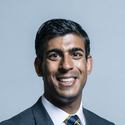

In [743]:
pm = "4483"
id_, title, img, url = get_member(pm)
process_thumbnail(url, pm)

In [728]:
# Write to Object Store, Elastic DB
from elasticsearch import Elasticsearch
import configparser

# TODO: Read in config
config = configparser.ConfigParser()
config.read('elastic.ini')

es = Elasticsearch(
    config["ELASTIC"]["host"]
)

In [729]:
#es.indices.create(index="pmq")

In [575]:
# Add PMQ date to Schema
# Add Speaker Order indices to Schema
import logging

INDEX = "pmq"
for _ in pmq_items:
    doc = _
    resp = es.index(index=INDEX, body=doc, request_timeout=30)
    logging.info(resp['result'])

/var/folders/9y/jc1z3n7n78ndcq81djws05m00000gn/T/ipykernel_86772/3480264177.py:8: DeprecationWarning: Passing transport options in the API method is deprecated. Use 'Elasticsearch.options()' instead.
  resp = es.index(index=INDEX, body=doc, request_timeout=30)
/var/folders/9y/jc1z3n7n78ndcq81djws05m00000gn/T/ipykernel_86772/3480264177.py:8: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use the 'document' parameter. See https://github.com/elastic/elasticsearch-py/issues/1698 for more information
  resp = es.index(index=INDEX, body=doc, request_timeout=30)


In [365]:
# TODO: Scale over other PMQs (3-5)
# TODO: .py Modularise ()
# TODO: Test Harness
# TODO: Usable Output
# TODO: Implement as Bot
# TODO: Store Objects (Elastic Search)
# TODO: Data Mine
# TODO: Handel Duplicates, ElasticSearch
# TODO: Use Parliament Hansard API

In [1]:
# import json
# import requests
# from pprint import pprint
#
# """ source: https://explore.data.parliament.uk/ """
# """ linked_data: http://lda.data.parliament.uk/answeredquestions """
#
# start = "2022-12-07"
# end = "2022-12-08"
#
# url = f"https://oralquestionsandmotions-api.parliament.uk/oralquestions/list?answeringDateStart={start}&answeringDateEnd={end}"
#
# r = requests.get(url, json=True)
# r.headers['content-type']
# r.encoding

'utf-8'

In [2]:
# response = r.json()
# pprint(response)

{'Errors': [],
 'PagingInfo': {'GlobalStatusCounts': [],
                'GlobalTotal': 65,
                'Skip': 0,
                'StatusCounts': [],
                'Take': 40,
                'Total': 65},
 'Response': [{'AnsweringBody': 'Prime Minister',
               'AnsweringBodyId': 23,
               'AnsweringMinister': {'Constituency': 'Richmond (Yorks)',
                                     'ListAs': 'Sunak, Rishi',
                                     'MnisId': 4483,
                                     'Name': 'Rishi Sunak',
                                     'Party': 'Conservative',
                                     'PartyColour': '0000ff',
                                     'PartyId': 4,
                                     'PhotoUrl': 'https://members-api.parliament.uk/api/Members/4483/Portrait?cropType=OneOne&webVersion=true',
                                     'PimsId': 6165,
                                     'Status': 'Active'},
               'Answ

In [ ]:
# def normalise_members(speakers):
#     members = []
#
#     for _ in speakers:
#         name = re.sub(r"\([^)]*\)", "", _)
#         name = re.sub(r"Dr", "", name)
#         name = re.sub(r"Mr", "", name)
#         name = re.sub(r"Mrs", "", name)
#         name = re.sub(r"Sir", "", name)
#         name = re.sub(r"Dame", "", name)
#         name = re.sub(r"[^\x00-\x7F]+", "", name)
#
#         members.append(name.strip())
#
#     return members
#
# def normalise_member(member):
#
#     member = re.sub(r"\([^)]*\)", "", member)
#     member = re.sub(r"Dr", "", member)
#     member = re.sub(r"Mr", "", member)
#     member = re.sub(r"Mrs", "", member)
#     member = re.sub(r"Dame", "", member)
#     member = re.sub(r"[^\x00-\x7F]+", "", member)
#
#     return member.strip()

# def get_member(name="Rishi Sunak"):
#     name = name.split()
#     print(name)
#
#     members_api = "https://members-api.parliament.uk/api/Members/Search?"
#     if len(name) > 1:
#         first = name[0]
#         last = name[1]
#         params = f"Name={first}%20{last}"
#
#     else:
#         name = name[-1]
#         params = f"Name={name}"
#
#     url = members_api + params
#
#     try:
#         result = requests.get(url, json=True).json()
#
#     except:
#         return None
#
#     if len(result["items"]) > 0:
#         id_ = result["items"][0]["value"]["id"]
#         full_title = result["items"][0]["value"]["nameFullTitle"]
#         party = result["items"][0]["value"]["latestParty"]["name"]
#         img = result["items"][0]["value"]["thumbnailUrl"]
#
#         return id_, full_title, party, img
#
#     else: return result["items"]

# for _ in speakers:
#     count += 1
#     if _ == "Prime Minister":
#         member_profiles.append(get_member())
#
#     else:
#         norm = normalise_member(_)
#         member_profiles.append(get_member(norm))

In [9]:
# # Get Member
#
# def get_post(member_id="4483"):
#     member_post = f"https://members-api.parliament.uk/api/Members/{member_id}/Biography"
#     result = requests.get(member_post, json=True).json()
#
#     if result["value"]["governmentPosts"][0] != [""]:
#         post = result["value"]["governmentPosts"]
#
#     if result["value"]["oppositionPosts"][0] != [""]:
#         post = result["value"]["oppositionPosts"]
#
#     return post
#
#
# # TODO: Role ie Opposition vs Member
# def extract_member(name):
#     #name = debate_item[0]
#     print(name)
#
#     if name.startswith("Prime Minister"):
#         id_, title, party, img = get_member()
#         post = get_post()
#
#     else:
#         name_split = name.split()
#         first, last = name_split[0], name_split[1]
#         id_, title, party, img = get_member(first, last)
#         post = get_post(id_)
#
#     return id_, title, party, post, img

In [191]:
# Comprehensive PMQs Object
#
# class DebateItem:
#     def __init__(self):
#         self.member = {}
#         self.question = {
#             "idx": []
#         }
#         self.response = {}
#
# debate_item = DebateItem().__dict__
#
# class PMQ:
#     def __init__(self, type):
#         self.type = type
#
#     def __call__(self, debate_item):
#         if self.type == "opposition":
#             debate_item["question"]["opposition_opening"] = []
#             debate_item["question"]["supplement"] = []
#
#             debate_item["response"]["opposition_opening"] = []
#             debate_item["response"]["supplement"] = []
#
#             return debate_item
#
#         elif self.type == "supplement":
#             debate_item["question"]["tabled"] = []
#             debate_item["question"]["supplement"] = []
#
#             debate_item["response"]["tabled"] = []
#             debate_item["response"]["supplement"] = []
#
#             return debate_item
#
#         elif self.type == "member":
#             debate_item["question"]["tabled"] = []
#             debate_item["response"]["tabled"] = []
#
#             return debate_item
#
#         else:
#             raise ValueError("incorrect type")
#
# pmq = PMQ(type="member")(debate_item)
# pmq

{'member': {},
 'question': {'idx': [], 'tabled': []},
 'response': {'tabled': []}}

In [303]:
# Comprehensive PMQs Object
#
# import re
#
# debate_chunks = []
# for _ in boundaries:
#     seek, stop = _[0], _[1]+1
#     debate_chunks.append((seek, stop, pmqs[seek: stop]))
#
# def get_type(member, questions):
#     member = member.lower()
#
#     if member.startswith("keir") or member.startswith("stephen flynn"):
#         return "opposition"
#
#     elif len(questions) > 1:
#         return "supplement"
#
#     else: return "member"
#
# debate = (_ for _ in debate_chunks)
# pmq_items = []
#
# counta = 0
# while counta < (len(debate_chunks)):
#
#     seek, stop, discourse = next(debate)
#     member = discourse[0][0]
#
#     # TODO: Make 'Prime Minister' Robust
#     questions = [_ for _ in discourse if _[0] != "Prime Minister"]
#     responses = [_ for _ in discourse if _[0] == "Prime Minister"]
#
#     type = get_type(member, questions)
#
#     debate_item = DebateItem().__dict__
#     pmq = PMQ(type=type)(debate_item)
#
#     for idx, _ in enumerate(zip(questions, responses)):
#         question, response = _
#
#         member = question[0]
#         q = question[1]
#         r = response[1]
#
#         q_idx = re.findall(r"(\b[Q]{1}[0-9]+[.])", q)
#         q_idx = (q_idx[0]) if q_idx != [] else ""
#
#         if idx == 0:
#             pmq["member"] = member
#
#         if type == "supplement":
#             if idx > 0:
#                 lst_idx = pmq["question"]["idx"][-1]
#                 q_idx = f"{lst_idx}{idx}"
#
#                 pmq["question"]["idx"].append(q_idx)
#                 pmq["question"]["supplement"].append(q)
#                 pmq["response"]["supplement"].append(r)
#
#             else:
#                 pmq["question"]["idx"].append(q_idx)
#                 pmq["question"]["tabled"].append(q)
#                 pmq["response"]["tabled"].append(r)
#
#         elif type == "opposition":
#             if idx > 0:
#                 pmq["question"]["supplement"].append(q)
#                 pmq["response"]["supplement"].append(r)
#
#             else:
#                 pmq["question"]["opposition_opening"].append(q)
#                 pmq["response"]["opposition_opening"].append(r)
#
#         elif type == "member":
#             pmq["question"]["idx"].append(q_idx)
#             pmq["question"]["tabled"].append(q)
#             pmq["response"]["tabled"].append(r)
#
#     pmq_items.append(pmq)
#     counta += 1

In [ ]:

    # if cur_member != "prime_minister":
    #     debate_item = {}
    #     debate_item["member"] = cur_member
    #     debate_item["questions"]["tabled"] = get_question()
    #     _ += 1
    #     next_member()




    # TODO: affirmative
    # if cur_member != "prime_minister":
    #     debate_item = {}
    #     debate_item["member"] = cur_member
    #     debate_item["questions"]["tabled"] = get_question()
    #     _ += 1
    #     next_member()
    #
    # if cur_member == "prime_minister":
    #     debate_item["response"]["tabled"] = get_question()
    #     _ += 1
    #
    # if cur_member == previous_member:
    #     debate_item["questions"]["supplement"] = get_question()
    #     _ += 1
    #
    # if counta == 3:
    #     break

In [15]:
# def cur_member():
#     global cur_member
#     global previous_member
#
#     member = pmqs[_][0]
#
#     if member.startswith("Prime Minister"):
#         cur_member = "prime_minister"
#
#     else:
#         cur_member = member
#         history.append(member)
#         previous_member = history[-2] if len(history) > 1 else history[-1]

# def get_question():
#     question = pmqs[_][1]
#
#     return question

# def is_supplemented():
#     if cur_member == previous_member:
#         return True
#
#     else:
#         return False

# def next_debate():
#     boundary = next(debate)
#
#     seek, finish = boundary[0], boundary[1]
#
#     return (seek, pmqs[seek: finish])

In [159]:
# history = []
# pm = False
#
# cur_speaker = ""
# previous_speaker = ""
#
# pm = False
#
# question_type = []
# question_idx = []
# question_history = []
#
# opposition_counts = {
#     "OPPOSITION_LABOUR": 0,
#     "OPPOSITION_SNP": 0,
#     "OPPOSITION_LIBERAL_DEMOCRATS": 0,
# }
# _ = 0
#
# debate = []
#
# class Question:
#      def __init__(self):
#         self.idx = ""
#         self.asking_member = ""
#         self.question = ""
#         self.response = ""
#         self.supplement = {
#             "idx": "",
#             "supplement": "",
#             "response": "",
#          }
#
# def turn():
#     global debate_item
#     global cur_speaker
#     global previous_speaker
#     global question_type
#     global _
#     global pm
#     global question
#     global debate
#     global question
#     global member
#
#     debate_item = pmqs[_]
#     id_, title, party, post, img = extract_member(debate_item)
#
#     # TODO: Class Obj
#     member = {
#         "id_": id_,
#         "title": title,
#         "party": party,
#         "post": post,
#         "img": img,
#     }
#
#     if member["title"].startswith("Rt Hon Rishi"):
#         pm = True
#
#     else: pm = False
#
#     _ += 1

In [ ]:
# question_types = []
#
# def type():
#     if previous_speaker and not pm:
#         if cur_speaker == previous_speaker:
#             if turns < 2:
#                 question_types.append("OPENING")
#
#             elif "leader" in cur_speaker["post"].lower().split():
#                 question_types.append("OPPOSITION")
#
#             else:
#                 question_types.append("SUPPLEMENT")
#
#         elif cur_speaker != previous_speaker:
#             if "leader" in cur_speaker["post"].lower().split():
#                 question_types.append("OPPOSITION")
#
#             else:
#                 question_types.append("MEMBER")
#
# engagements = []
# turns = 0
# _ = 0
#
# turn()
# while _ < (len(pmqs) - 1):
#     turn()
#
#     # Create question
#     turns += 1
#
#     if turns > 2:
#         break
#
#     if not pm:
#         if cur_type == "SUPPLEMENT":
#             question_count = 2
#             previous_question = debate[-1]
#
#             idx = f"{idx}{question_count}"
#
#             previous_question["supplement"]["idx"] = idx
#             previous_question["supplement"]["supplement"] = debate_item[1]
#
#         else:
#             question = Question().__dict__
#             debate.append(question)
#
#             type()
#             cur_type = question_types[-1]
#             print(cur_type)
#
#             idx = re.findall(r"(\b[Q]{1}[0-9]+[.])", cur_question[1])
#             idx = str(idx[0]) if idx != [] else ""
#
#
#
#         question_count = 0
#         question["asking_member"] = member.copy()
#
#         idx = re.findall(r"(\b[Q]{1}[0-9]+[.])", debate_item[1])
#         idx = str(idx[0]) if idx != [] else ""
#
#         question["idx"] = idx
#         question["question"] = debate_item[1]
#         debate.append(question)
#
#
#         previous_speaker = debate[-2]["asking_member"] if len(debate) > 1 else debate[-1]
#
#     elif pm:
#         if cur_type == "SUPPLEMENT":
#             print("SUPPLEMENT")
#             cur_question["supplement"]["response"] = debate_item[1]
#             print(debate_item[1])
#             print(cur_question)
#
#         elif cur_type in ["MEMBER", "OPENING", "OPPOSITION"]:
#             cur_question["response"] = debate_item[1]
#
#     cur_speaker = debate[-1]["asking_member"]
#     cur_question = debate[-1]
#
#
#     # if cur_type in ["MEMBER", "OPENING", "SUPPLEMENT"]:
#     #     if cur_type == "SUPPLEMENT":
#     #         question_count += 1
#     #         previous_question = history[-1]
#     #
#     #         idx = f"{idx}{question_count}"
#     #
#     #         previous_question["supplement"]["idx"] = idx
#     #         previous_question["supplement"]["supplement"] = debate_item[1]
#
#
#     # if peek == "OPPOSITION":
#     #     question = {
#     #         "idx": "",
#     #         "asking_member": "",
#     #         "questions": [],
#     #         "responses": []
#     #     }
#     #
#     #     idx = f"OP{opposition}.{opp_count}"
#     #     question_idx.append(idx)
#     #
#     #     question["idx"] = idx
#     #     question["asking_member"] = cur_speaker
#     #     question["questions"].append(debate)
#
# class Debate_item():
#     def __init__(self):
#         self.member = {}
#         self.questions = {
#             "tabled": "",
#             "supplement": []
#         }
#         self.response = {
#             "tabled": "",
#             "supplement": []
#         }
#
# class Debate_item():
#     member = {}
#     questions = {
#         "tabled": "",
#         "supplement": []
#     }
#     response = {
#         "tabled": "",
#         "supplement": []
#     }
#
# item_ = Debate_item().__dict__

In [ ]:
# engagements = []
# turns = 0
# _ = 0
#
# turn()
# while _ < (len(pmqs) - 1):
#
#     peek = question_type[-1]
#
#     if not pm:
#         turns += 1
#
#     if pm:
#         if peek == "SUPPLEMENT":
#             question["supplement"]["response"] = debate_item[1]
#             continue
#
#         elif peek == "MEMBER" or peek == "OPPOSITION":
#             question["response"].append(debate_item[1])
#             continue
#
#     if peek != "OPPOSITION":
#         if peek != "SUPPLEMENT":
#             question_count = 0
#
#             question = {
#                 "idx": "",
#                 "asking_member": "",
#                 "question": [],
#                 "response": [],
#                 "supplement": {
#                         "idx": "",
#                         "supplement": "",
#                         "response": "",
#                     },
#             }
#
#         idx = re.findall(r"(\b[Q]{1}[0-9]+[.])", debate_item[1])
#         idx = str(idx[0]) if idx != [] else ""
#
#         question["idx"] = idx
#         question["asking_member"] = cur_speaker["title"]
#         question["question"].append(debate_item[1])
#
#         question_idx.append(idx)
#
#         if peek == "SUPPLEMENT":
#             # Extend existing question
#             question_count += 1
#             idx = f"{idx}{question_count}"
#
#             question["supplement"]["idx"] = idx
#             question["supplement"]["supplement"] = debate_item[1]
#
#     engagements.append(question)
#     turn()
#     # if peek == "OPPOSITION":
#     #     question = {
#     #         "idx": "",
#     #         "asking_member": "",
#     #         "questions": [],
#     #         "responses": []
#     #     }
#     #
#     #     idx = f"OP{opposition}.{opp_count}"
#     #     question_idx.append(idx)
#     #
#     #     question["idx"] = idx
#     #     question["asking_member"] = cur_speaker
#     #     question["questions"].append(debate)

In [ ]:

    # # TODO: Robust over multiple Oppositions
    # # TODO: Update 'or' operation
    # elif
    #     opposition = int(position(cur_speaker)[-1])
    #     opposition_party = opposition_idx[opposition]
    #
    #     opposition_counts[opposition_party] += 1
    #
    #     question = {
    #         "idx": "",
    #         "asking_member": "",
    #         "questions": [],
    #         "supplements": {
    #                 "idx": "",
    #                 "supplement": "",
    #                 "responses": "",
    #             },
    #         "responses": []
    #     }
    #
    #     idx = f"OP{opposition}.{opp_count}"
    #     question_idx.append(idx)
    #
    #     question["idx"] = idx
    #     question["asking_member"] = cur_speaker
    #     question["questions"].append(debate)

In [15]:
# pmqs = soup.find_all("p", class_="Question")
# debate = soup.find_all("div", class_="debate-item debate-item-contributiondebateitem")
#
# child_debates = soup.find_all("div", class_="child-debate")
# contributions = soup.find_all("div", class_="contribution")
#
# content = soup.find_all("div", class_="content")
# print(content)

In [16]:
# SIMPLE
# _ = 0
# debate_it = 0
# debating = True
# debate_items = []
# while debating and (_ < len(pmqs) - 1):
#     responding = False
#
#     debate_item = []
#
#     debate_it += 1
#     print(f"Debate {debate}")
#
#     member, debate = pmqs[_]
#     debate_item.append(pmqs[_])
#
#     print(member, "\n")
#     print(debate, "\n")
#
#     lookahead = pmqs[_ + 1]
#
#     if lookahead[0] == "Prime Minister":
#         responding = True
#
#         while responding and (_ < len(pmqs) - 1):
#             _ += 1
#
#             if pmqs[_][0] != "Prime Minister":
#                 responding = False
#
#             else:
#                 print("PM: ")
#                 response = pmqs[_][1]
#                 debate_item.append(pmqs[_])
#                 print(response)
#
#     debate_items.append(debate_item)
#     print("====")

In [17]:
# WITH CASES

# QUESTIONING SEQUENCE
# ===
#
# if first_question is asked by an goverment_mp:
#     next_question(leader_of_opposition)
#
# if the first_question is asked by an opposition_mp:
#     next_question(govenrment_member)
#
# # TODOs: Military death
#
# gender = "he" if member == male else "she"
# speak(emergency=False, init=False, block=False):
#     if init=True:
#         if emergency:
#             print(f"emergent policy {emergent_topic}")
#
#         else:
#             print(f"if he {gender} will list his {gender} engagements for the day"
#
#     if (leader_of_opposition and block):
#         print([i for i in question_num])
#
#     elsif (leader_of_opposition and not block):
#         print([i for i in question_num[0:len(question_num//2)]
#         pm_turn()
#         print([i for i in question_num[len(question_num//2):]
#
#     else:
#         print(question)
#
#
# question_counta = 0
# next_question():
#     question_counta += 1
#         if emergency:
#             speak(emergency=True)
#
#         else:
#             speak(init=True)
#
#     if len(questions) > 15:
#         break
#
#     if question_counta == 1:
#         speak(init=True)
#
#     if leader_of_opposition == offical:
#         table_in_advance = False
#         question_num = set(6)
#
#         if block:
#             speak(block=True)
#
#         else:
#             speak(block=False)
#
#     elif leader_of_opposition == second_official:
#         table_in_advance = False
#         question_num = set(2)
#         speak()
#
#     elif leader_of_opposition == third_official:
#         table_in_advance = False
#         question_num = set(2)
#         speak()
#
#     else:
#         table_in_advance = True
#         questions = set(1)
#         return questions
#         speak()
#
# """

In [15]:
# # TODO: Construct through Parliament API
# # TODO: PMQs as a Class
#
# members = {
#     "Prime Minister": "head of government",
#     "Rishi Sunak": "head of government",
#     "Keir Starmer": "leader of the opposition 1",
#     "Stephen Flynn": "leader of the opposition 2",
#     "Dr Philippa Whitford": "SNP",
#     "Anthony Browne": "Conservative",
#     "Nickie Aiken": "Conservative",
#     "David Morris": "Conservative",
#     "Stephen Farry": "Alliance",
#     "Darren Henry": "Conservative",
#     "Ian Byre": "Labour",
#     "Gareth Davies": "Conservative",
#     "Siobhan McDonagh": "Labour",
#     "Rehman Chishti": "Labour",
#     "Mary Kelly Fox": "Labour",
#     "Conor Burns": "Conservative",
#     "Allan Dorans": "SNP",
#     "Jackie Doyle-Price": "Conservative",
#     "Dame Diana Johnson": "Labour",
#     "Andrew Brigden": "Conservative",
#     "Kevin Brennon": "Conservative",
#     "Matt Warman": "Conservative",
#     "Chris Elmore": "Labour",
#     "Mr Robin Walker": "Conservative",
#     "Clair Hanna": "SDLP",
# }

In [ ]:
"""
PMQs Algo
===

PMQs - the most distinctive and internationally famous feature of British politics ...

1. backbench members proposing a question enter names on an order paper

2. name of entrants is shuffled in a ballot to product random order

3. speaker calls members as a random series, alternating government and opposition positions

4. if member == leader of the 'official' opposition:
    ask 6 questions
        questions == set(6) or (set(3) + set(3))

4. non chosen members may be asked to provide a supplementatry question according to 'catch the eye ()' of the speaker

QUESTIONING SEQUENCE
===

if first_question is asked by an goverment_mp:
    next_question(leader_of_opposition)

if the first_question is asked by an opposition_mp:
    next_question(govenrment_member)

# TODOs: Military death

gender = "he" if member == male else "she"
speak(emergency=False, init=False, block=False):
    if init=True:
        if emergency:
            print(f"emergent policy {emergent_topic}")

        else:
            print(f"if he {gender} will list his {gender} engagements for the day"

    if (leader_of_opposition and block):
        print([i for i in question_num])

    elsif (leader_of_opposition and not block):
        print([i for i in question_num[0:len(question_num//2)]
        pm_turn()
        print([i for i in question_num[len(question_num//2):]

    else:
        print(question)


question_counta = 0
next_question():
    question_counta += 1
        if emergency:
            speak(emergency=True)

        else:
            speak(init=True)

    if len(questions) > 15:
        break

    if question_counta == 1:
        speak(init=True)

    if leader_of_opposition == offical:
        table_in_advance = False
        question_num = set(6)

        if block:
            speak(block=True)

        else:
            speak(block=False)

    elif leader_of_opposition == second_official:
        table_in_advance = False
        question_num = set(2)
        speak()

    elif leader_of_opposition == third_official:
        table_in_advance = False
        question_num = set(2)
        speak()

    else:
        table_in_advance = True
        questions = set(1)
        return questions
        speak()

"""